In [1]:
pip install git+https://github.com/boomb0om/CRAFT-text-detection/

  Cloning https://github.com/boomb0om/CRAFT-text-detection/ to /tmp/pip-req-build-uk1s6x61
  Running command git clone --filter=blob:none --quiet https://github.com/boomb0om/CRAFT-text-detection/ /tmp/pip-req-build-uk1s6x61
  Resolved https://github.com/boomb0om/CRAFT-text-detection/ to commit 20f0c94d6b74f7fc857b1c6a6fed11adae7c9393
  Preparing metadata (setup.py) ... done
  Created wheel for CRAFT: filename=CRAFT-1.0-py3-none-any.whl size=11870 sha256=66efd82feca6a78d07957bad7df46dff284b41956bf544c437ddb1ddde6d35ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-ca4kcn0i/wheels/88/bd/3f/a844031211dd81dd807c417a1400c5468c07ffd6b3aec66897
Successfully built CRAFT
Note: you may need to restart the kernel to use updated packages.


/opt/conda/lib/python3.10/site-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'cached_download' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` instead.
  warnings.warn(warning_message, FutureWarning)
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=No

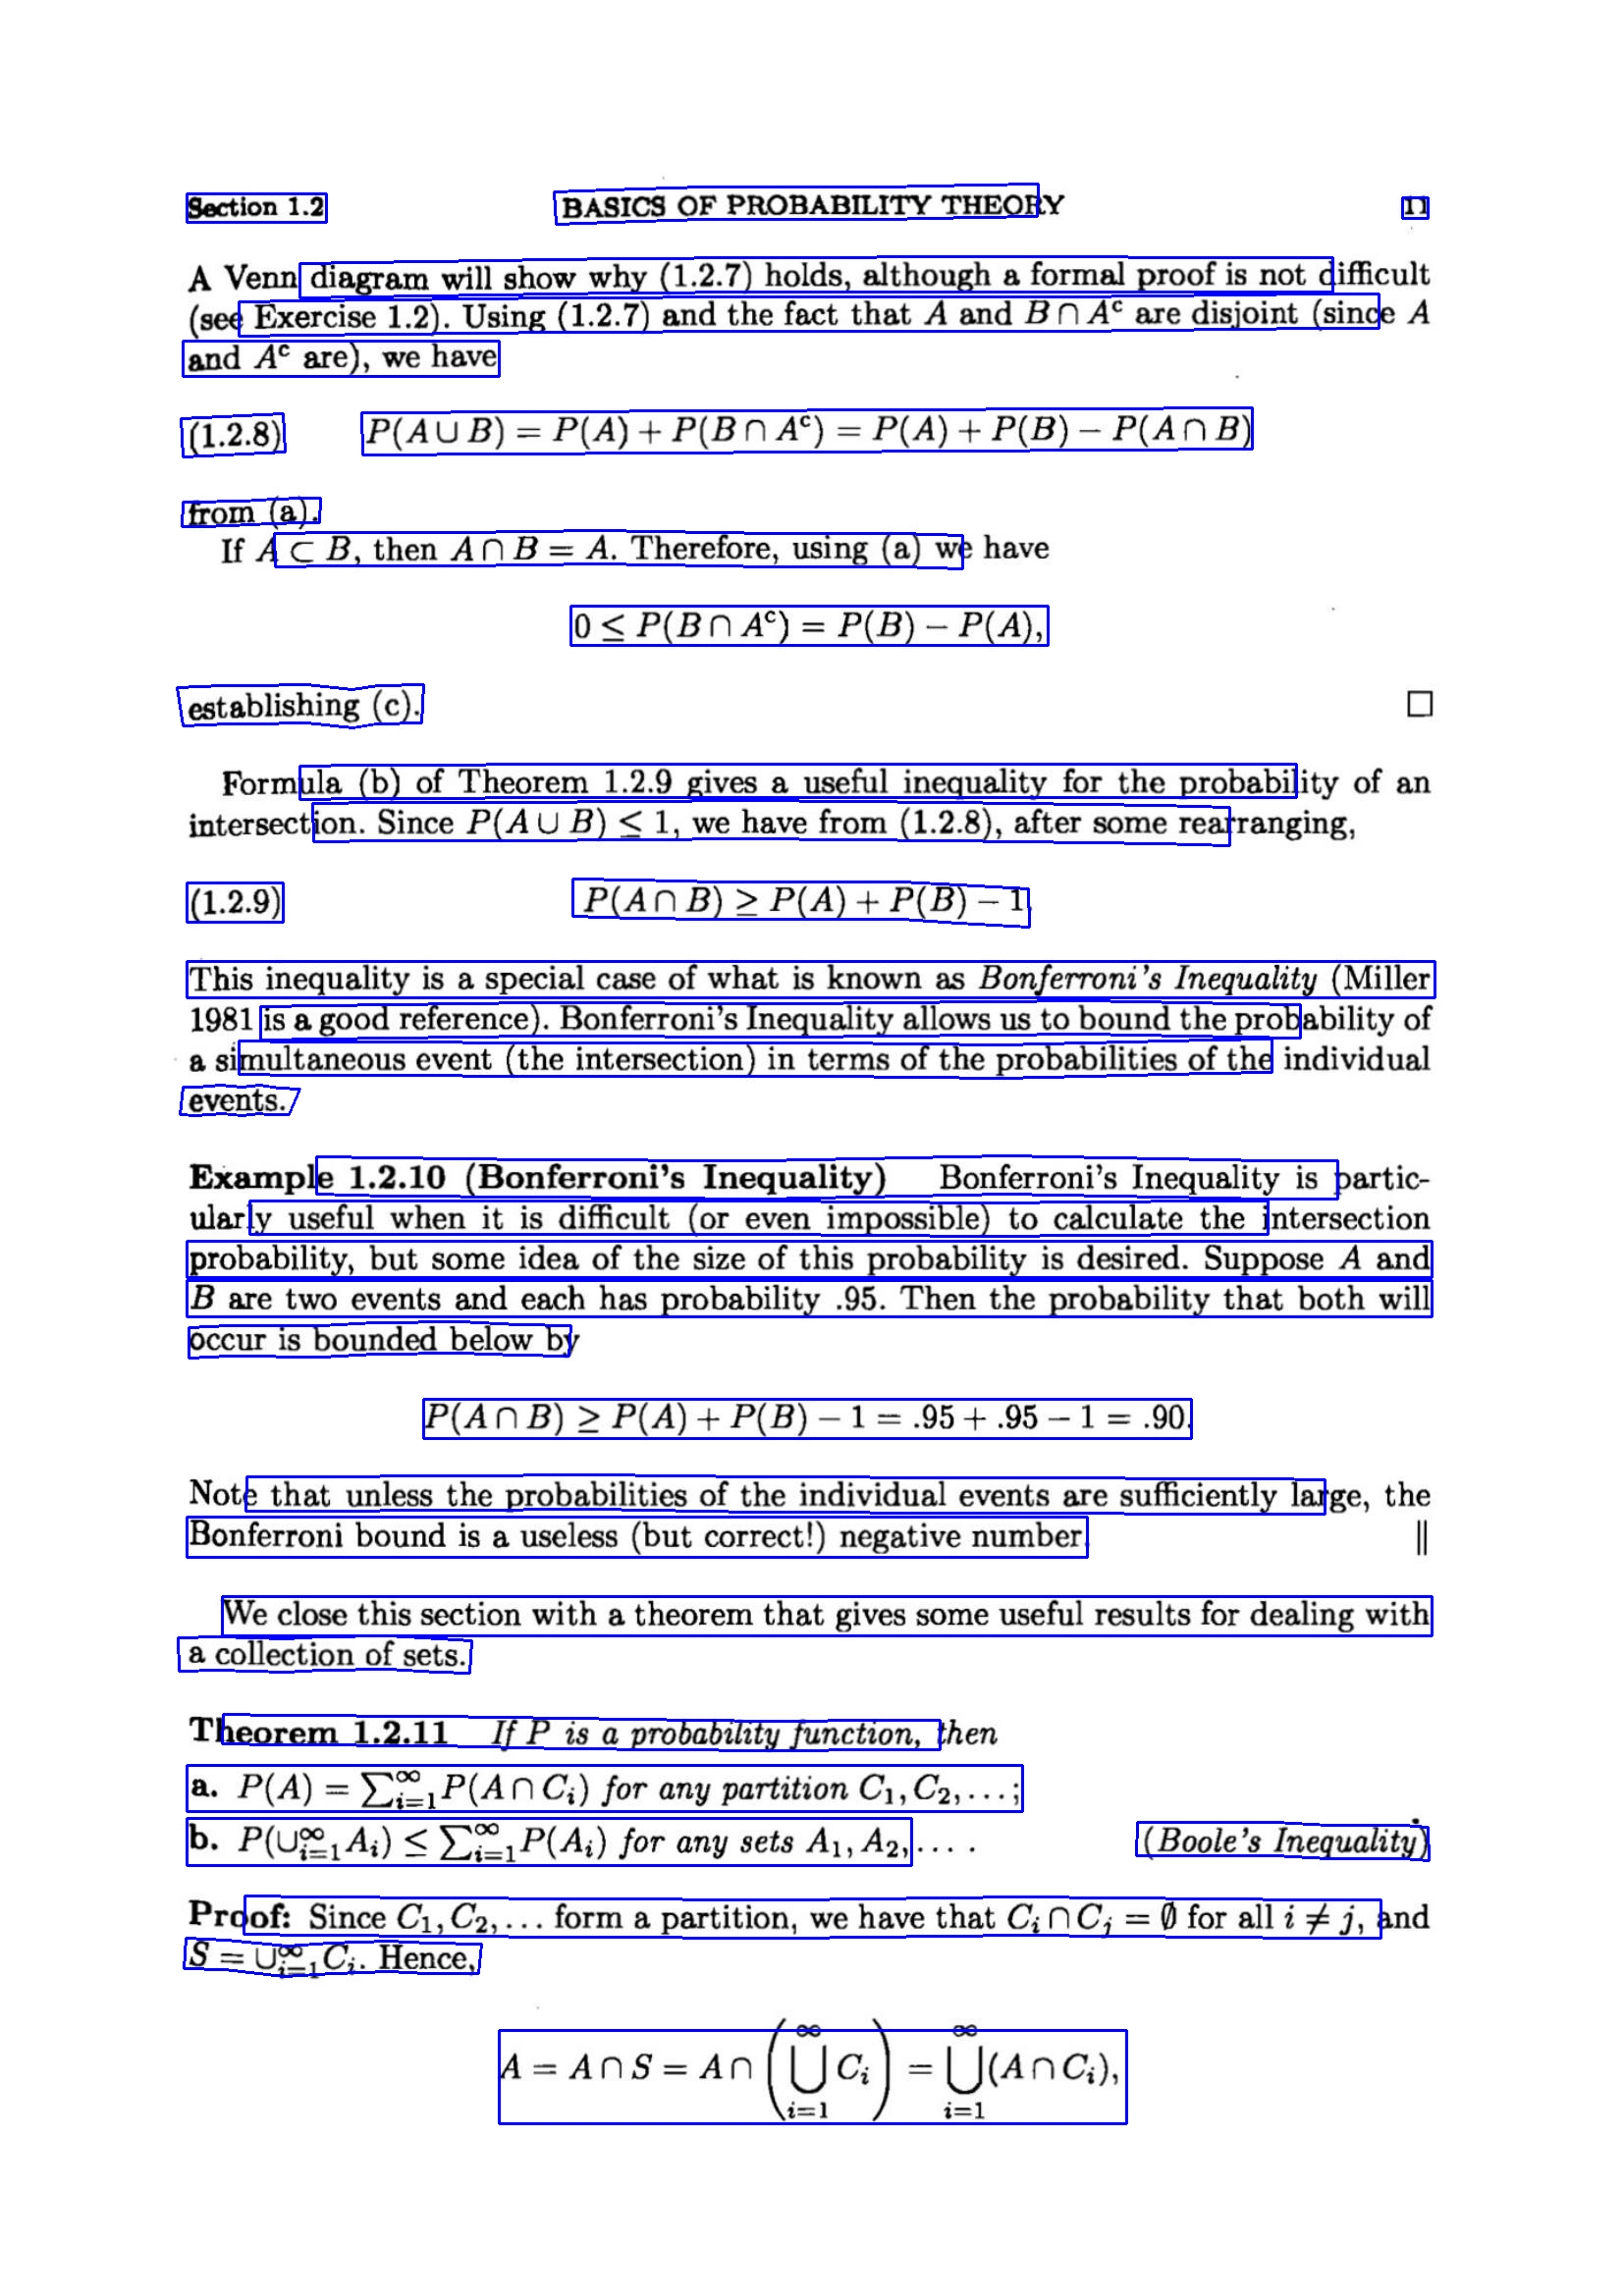

In [14]:
from PIL import Image
from CRAFT import CRAFTModel, draw_polygons

model = CRAFTModel('weights/', 'cuda', use_refiner=True, fp16=True)
img = Image.open('/kaggle/working/converted_image_1.jpeg').convert('RGB')
polygons = model.get_polygons(img)
result=draw_polygons(img, polygons)


In [3]:
!pip install peft

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 5.9 MB/s eta 0:00:00a 0:00:01


In [11]:
from transformers import VisionEncoderDecoderModel, AutoTokenizer, AutoFeatureExtractor
import torch
from PIL import Image

# load model, tokenizer, and feature extractor
model = VisionEncoderDecoderModel.from_pretrained("DGurgurov/im2latex").to(device)
tokenizer = AutoTokenizer.from_pretrained("DGurgurov/im2latex")
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/swin-base-patch4-window7-224-in22k") # using the original feature extractor for now

# prepare an image
image = Image.open("/kaggle/input/pribe3ec/formula.png").convert('RGB')
pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values

# Move pixel_values to the same device as the model
pixel_values = pixel_values.to(device) # Assuming 'device' is defined as 'cuda:0'

# generate LaTeX formula
generated_ids = loaded_model.generate(pixel_values)
generated_texts = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

print("Generated LaTeX formula by fine tuned model :", generated_texts[0])

# generate LaTeX formula
generated_ids = model.generate(pixel_values)
generated_texts = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

print("Generated LaTeX formula by model :", generated_texts[0])

Generated LaTeX formula by fine tuned model : \sin ^ { 2 } ( t - t ^ { t } ) \frac { \sin \theta } { r } \sin ( r + r ^ { 0 } + r + 1 r + 2 r + 3 r ) d r \sin t ) = \frac{ \sin d t } { ( 1 - \frac{\sin d } {r } ) r + t }.
Generated LaTeX formula by model : \begin{align*}\mathbf{a}^{\mathfrak{pf}}_{\ast}(1\!-\!\frac{\mathsf{asympt}}{\mathbf{\tau}})\!^{\frac{pq\mathbf\Phi}{p\mathrm{s}}}\!(\mathbf {\tau}^{p}\!+\!p^{\ast}\!\mathcal{H}\!{\!\tau}\!{+}\!r^{\leftrightarrow}\!p\leftrightrightarrows\!r\!q\right)\!_{\frac{1}{\Gamma}}\! \frac{d^{p}}{\Gamma^{p+\overline{q}}}.\end{align*.}


In [3]:
!pip install transformers
!pip install sentencepiece
!pip install jiwer
!pip install datasets
!pip install evaluate
!pip install -U accelerate

!pip install matplotlib
!pip install tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 1.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.2/333.2 kB 6.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2


In [8]:
# Install Poppler

!apt-get install -y poppler-utils

# Install LaTeX
!apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 68 not upgraded.
1 not fully installed or removed.
After this operation, 0 B of additional disk space will be used.
Setting up tex-common (6.17) ...
Running mktexlsr. This may take some time... done.
Running updmap-sys. This may take some time... done.
Running mktexlsr /var/lib/texmf ... done.
Building format(s) --all.
	This may take some time... 
fmtutil failed. Output has been stored in
/tmp/fmtutil.vPbwcXh5
Please include this file if you report a bug.

dpkg: error processing package tex-common (--configure):
 installed tex-common package post-installation script subprocess returned error exit status 1
Errors were encountered while processing:
 tex-common
E: Sub-process /usr/bin/dpkg returned an error code (1)
Reading package lists... Done
Building dependency tree... Done
Read

In [9]:

from pdf2image import convert_from_path

import os
import tempfile
from pathlib import Path
import subprocess
import numpy as np
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch
from PIL import Image
import cv2
from CRAFT import CRAFTModel, draw_polygons

In [13]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-handwritten')
device = "cuda" if torch.cuda.is_available() else "cpu"
model = VisionEncoderDecoderModel.from_pretrained('/kaggle/input/modell/archive/kaggle/working/trocr_handwritten/checkpoint-13540').to(device)
polygon_model = CRAFTModel('weights', 'cuda', use_refiner=True, fp16=True)
PERMANENT_DIR = "pdf_images"
Path(PERMANENT_DIR).mkdir(parents=True, exist_ok=True)  # Creates the directory if it doesn't exist
import os

def load_image(image_path):
    """Load an image from a file."""
    return cv2.imread(image_path)

import numpy as np

def crop_polygons(image, polygons):
    """
    Crop images based on the provided polygons.
    :param image: The original image.
    :param polygons: List of polygons defining the areas to crop.
    :return: List of cropped images and their y-positions.
    """
    # Convert PIL Image to NumPy array for OpenCV compatibility
    image = np.array(image)
    
    cropped_images = []
    y_positions = []
    
    for i, polygon in enumerate(polygons):
        # Create a mask for the polygon
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.fillPoly(mask, [np.array(polygon, dtype=np.int32)], 255)

        # Get the bounding box of the polygon
        x, y, w, h = cv2.boundingRect(np.array(polygon, dtype=np.int32))
        
        # Crop the image using the mask
        masked_image = cv2.bitwise_and(image, image, mask=mask)
        cropped_image = masked_image[y:y+h, x:x+w]

        # Resize the cropped image for the text recognition model
        cropped_image = cv2.resize(cropped_image, (640, 480))
        
        cropped_images.append(cropped_image)
        y_positions.append(np.mean([point[1] for point in polygon]))  # Mean y-coordinate
        filename = os.path.join('/kaggle/working/pdf_images', f'cropped_image_{i + 1}.png')
        cv2.imwrite(filename, cropped_image)
    return cropped_images, y_positions


def recognize_text_from_images(cropped_images):
    """
    Recognize text from a list of cropped images.
    :param cropped_images: List of cropped images.
    :return: List of recognized text strings.
    """
    recognized_texts = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Move model to the correct device
    model.to(device)
    
    for cropped_image in cropped_images:
        # Convert OpenCV BGR image to PIL format for processing
        image = Image.fromarray(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        
        # Process the image and move pixel values to the correct device
        pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)
        
        # Generate text from the model
        generated_ids = model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
        recognized_texts.append(generated_text)
    
    return recognized_texts


def upload_pdf():
    
    pdf_path = "/kaggle/input/pribe3ec/printed.pdf"
    print("setp 1")
    # Convert PDF pages to images
    images = convert_from_path(pdf_path, dpi=200, fmt="jpeg")
    print("setp 2")
    # Save images to the current working directory and collect their paths
    image_paths = []
    for i, image in enumerate(images):
        print("hey")
        
        print("setp 3")
        filename = os.path.join('/kaggle/working/', f'converted_image_{i + 1}.jpeg')
        image.save(filename, "JPEG")
        image = image.convert('RGB')


        polygons = polygon_model.get_polygons(image)
        
        image_path = os.path.join(os.getcwd(), f"{os.path.splitext(os.getcwd())[0]}_page_{i + 1}.jpeg")
        image.save(image_path, "JPEG")
        image_paths.append(image_path)
            # Crop images and retrieve their y-positions
        cropped_images, y_positions = crop_polygons(image, polygons)
       
        # Recognize text from cropped images
        recognized_texts = recognize_text_from_images(cropped_images)
#         recognized_texts = ["sorry will be soon available","facing issues with resources"]
        # Combine recognized texts into paragraphs based on y-positions
        merged_paragraphs = []
        current_paragraph = ""
        threshold = 70  # Define a threshold for merging based on y-coordinate proximity

        for i, text in enumerate(recognized_texts):
            if text.strip():  # If the recognized text is not empty
                if current_paragraph:  # If there is already some text in the paragraph
                    # Check if current and last y-position are within the threshold
                    if abs(y_positions[i] - y_positions[i - 1]) < threshold:
                    
                        current_paragraph=  text.strip()+ " " + current_paragraph

                    else:
                        merged_paragraphs.append(current_paragraph.strip())
                        current_paragraph = text.strip()+ "\\newline"   # Start a new paragraph
                else:
                    current_paragraph = text.strip()+ "\\newline"   # Start a new paragraph

        # Append any remaining text
        if current_paragraph:
            merged_paragraphs.append(current_paragraph.strip())

        # Print the recognized text paragraphs
        print("Recognized Text Paragraphs:")
        for i, paragraph in enumerate(merged_paragraphs):
            text+=f"""{paragraph}
"""
        text+= r"""\\newpage"""        

    # Minimal LaTeX code for testing
        # Minimal LaTeX code for testing
    header = latex_code = r"""
\documentclass{article}
\usepackage{amsmath}

\begin{document}

\title{Sample Document}
\author{Author Name}
\date{\today}
\maketitle

\section



"""
    footer=r"""\end{document}"""
    
    latex_code = header+text+footer
    print(latex_code)
    # Write LaTeX code to file in the current working directory
    latex_file_path = os.path.join(os.getcwd(), "output.tex")
    with open(latex_file_path, "w") as f:
        f.write(latex_code)

    # Compile the LaTeX file
    process = subprocess.run(['pdflatex', latex_file_path], capture_output=True, text=True)

    if process.returncode != 0:
        print("LaTeX compilation failed:")
        print(process.stderr)
        
    else:
        print("LaTeX compilation success:")
        pdf_output_path = os.path.join(os.getcwd(), "output.pdf")

        # Add cleanup tasks to remove files after response
        

        # Return the compiled PDF as a response
        

def cleanup_files(file_paths):
    """Delete files from provided paths."""
    for file_path in file_paths:
        try:
            if os.path.exists(file_path):
                os.remove(file_path)
        except Exception as e:
            print(f"Failed to delete {file_path}: {e}")
            
            
upload_pdf()

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'cached_download' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` instead.
  warnings.warn(warning_message, FutureWarning)
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The p

setp 1
setp 2
hey
setp 3
Recognized Text Paragraphs:

\documentclass{article}
\usepackage{amsmath}

\begin{document}

\title{Sample Document}
\author{Author Name}
\date{\today}
\maketitle

\section



SPECIAL_CHARACTERSPECIAL_CHARACTER SPECIAL_CHARACTER SPECIAL_CHARACTER 11 Section1.2 SPECIAL_CHARACTER\newline
(1.2.8) SPECIAL_CHARACTER\newline
SPECIAL_CHARACTER from(a)\newline
SPECIAL_CHARACTER\newline
establishing(c)\newline
SPECIAL_CHARACTER SPECIAL_CHARACTER\newline
PLANB)2P(A)+P(B)- (1.2.9)\newline
events. SPECIAL_CHARACTER is aground/Biomers/female/nifurniture/Cossional-Cost SPECIAL_CHARACTER\newline
occurisbounded leaders SPECIAL_CHARACTER probability.menucleoses SPECIAL_CHARACTER SPECIAL_CHARACTER\newline
SPECIAL_CHARACTER\newline
SPECIAL_CHARACTER SPECIAL_CHARACTER\newline
a collectionofsets. SPECIAL_CHARACTER\newline
(BOole's/mequality) SPECIAL_CHARACTER SPECIAL_CHARACTER SPECIAL_CHARACTER\newline
SPECIAL_CHARACTER SPECIAL_CHARACTER\newline
SPECIAL_CHARACTER\newline
\\newpage\

In [31]:
import cv2
import numpy as np
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from CRAFT import CRAFTModel, draw_polygons

# Load CRAFT model
model = CRAFTModel('weights/', 'cuda', use_refiner=True, fp16=True)

# Load the image
img = Image.open('/kaggle/input/nadikcew/eng_AF_004.jpg')
polygons = model.get_polygons(img)


# Load the TrOCR model and processor
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-handwritten')
text_model = VisionEncoderDecoderModel.from_pretrained('/kaggle/input/modell/archive/kaggle/working/trocr_handwritten/checkpoint-13540')

def load_image(image_path):
    """Load an image from a file."""
    return cv2.imread(image_path)

def sort_polygons(polygons):
    """Sort polygons by their topmost y-coordinates and then by their leftmost x-coordinates."""
    # Create a list of tuples (polygon, top y-coordinate, leftmost x-coordinate)
    sorted_polygons = sorted(polygons, key=lambda p: (min(point[1] for point in p), min(point[0] for point in p)))
    return sorted_polygons

def crop_polygons(image, polygons):
    """Crop images based on the provided polygons."""
    cropped_images = []
    y_positions = []
    
    # Sort the polygons first
    sorted_polygons = sort_polygons(polygons)

    for polygon in sorted_polygons:
        # Create a mask for the polygon
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.fillPoly(mask, [np.array(polygon, dtype=np.int32)], 255)

        # Get the bounding box of the polygon
        x, y, w, h = cv2.boundingRect(np.array(polygon, dtype=np.int32))
        
        # Crop the image using the mask
        masked_image = cv2.bitwise_and(image, image, mask=mask)
        cropped_image = masked_image[y:y+h, x:x+w]

        # Resize the cropped image for the text recognition model
        cropped_image = cv2.resize(cropped_image, (640, 480))
        
        # Only append if cropped_image is not empty
        if cropped_image.size > 0:
            cropped_images.append(cropped_image)
            y_positions.append(np.mean([point[1] for point in polygon]))  # Mean y-coordinate

    return cropped_images, y_positions

def recognize_text_from_images(cropped_images):
    """Recognize text from the cropped images using the model."""
    recognized_texts = []
    for cropped_image in cropped_images:
        image = Image.fromarray(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        pixel_values = processor(images=image, return_tensors="pt").pixel_values
        generated_ids = text_model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
        recognized_texts.append(generated_text)
    return recognized_texts

# Load your original image
image_path = '/kaggle/input/nadikcew/eng_AF_004.jpg'  # Update with your image path
original_image = load_image(image_path)

# Crop images and retrieve their y-positions
cropped_images, y_positions = crop_polygons(original_image, polygons)

# Recognize text from cropped images
recognized_texts = recognize_text_from_images(cropped_images)

# Combine recognized texts into paragraphs based on y-positions
merged_paragraphs = []
current_paragraph = ""
threshold = 110  # Adjust this threshold as needed

# Ensure the correct order of recognized texts and their y-positions
sorted_y_positions = [y_positions[i] for i in range(len(y_positions))]
sorted_recognized_texts = [recognized_texts[i] for i in range(len(recognized_texts))]

for i in range(len(sorted_recognized_texts)):
    text = sorted_recognized_texts[i]
    if text.strip():  # If the recognized text is not empty
        if current_paragraph:  # If there is already some text in the paragraph
            # Check if current and last y-position are within the threshold
            if abs(sorted_y_positions[i] - sorted_y_positions[i - 1]) < threshold:
                current_paragraph=  text.strip()+ " " + current_paragraph# Merge
            else:
                merged_paragraphs.append(current_paragraph.strip())
                current_paragraph = text.strip()  # Start a new paragraph
        else:
            current_paragraph = text.strip()  # Start a new paragraph

# Append any remaining text
if current_paragraph:
    merged_paragraphs.append(current_paragraph.strip())

# Output recognized paragraphs
print("Recognized Text Paragraphs:")
for i, paragraph in enumerate(merged_paragraphs):
    print(f"Paragraph {i + 1}: {paragraph}")


Recognized Text Paragraphs:
Paragraph 1: DJ1ROCTS
Paragraph 2: Date:
Paragraph 3: What I'd hope achieve durations
Paragraph 4: of period membership
Paragraph 5: and writing
Paragraph 6: Improve myspection
Paragraph 7: a learn business
Paragraph 8: $0 do
Paragraph 9: need things
Paragraph 10: time andday setasie
Paragraph 11: How mortgage
Paragraph 12: for Apply course
Paragraph 13: how to usecanva action for free pattern courses
